In [1]:
import matplotlib.pyplot as plt

C:\Users\asus\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


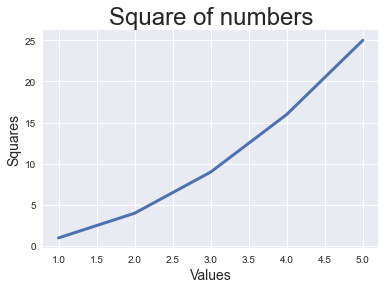

In [2]:
input_values = [1, 2, 3, 4, 5]
squares = [1, 4, 9, 16, 25]

plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots()

axs.plot(input_values, squares, linewidth=3)
axs.set_title('Square of numbers', fontsize=24)
axs.set_xlabel('Values', fontsize=14)
axs.set_ylabel('Squares', fontsize=14)

axs.tick_params(labelsize=10)

plt.show()

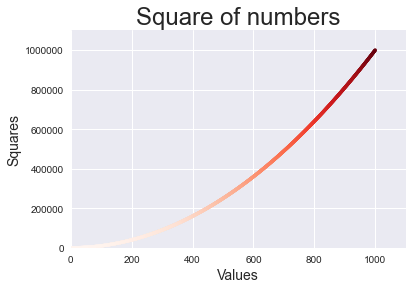

In [3]:
x_values = range(1, 1001)
y_values = [x**2 for x in x_values]

fig, axs = plt.subplots()
# axs.scatter(x_values, y_values, color=(0, 0.8, 0), s=10)
axs.scatter(x_values, y_values, c=y_values, cmap=plt.cm.Reds, s=10)

axs.set_title('Square of numbers', fontsize=24)
axs.set_xlabel('Values', fontsize=14)
axs.set_ylabel('Squares', fontsize=14)

axs.tick_params(labelsize=10)

axs.axis([0, 1100, 0, 11_00_000])
axs.ticklabel_format(style='plain')

plt.savefig('squares_plot.png', bbox_inches='tight')

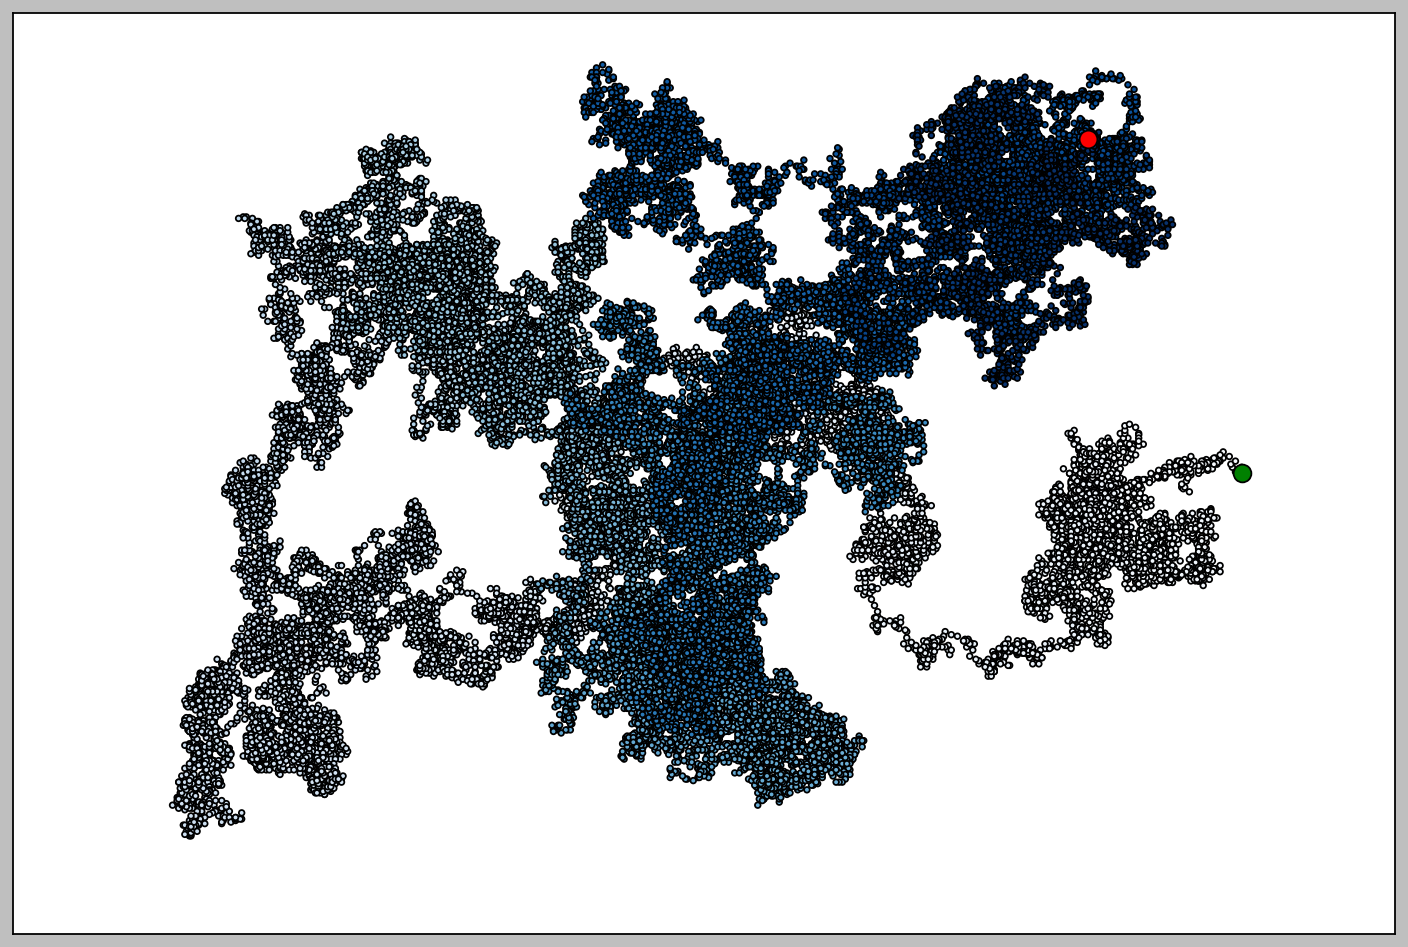

In [4]:
# Lets create a random walk
from random import choice
class Randomwalk:
    def __init__(self, num_points=5000):
        self.num_points = num_points
        self.x_values = [0]
        self.y_values = [0]
        
    def fill_walk(self):
        while len(self.x_values) < self.num_points:
            x_direction = choice([-1, 1])
            x_distance = choice([0, 1, 2, 3, 4])
            x_step = x_direction * x_distance
            
            y_direction = choice([-1, 1])
            y_distance = choice([0, 1, 2, 3, 4])
            y_step = y_direction * y_distance
            
            if x_step == 0 and y_step == 0:
                continue
                
            x = self.x_values[-1] + x_step
            y = self.y_values[-1] + y_step
            
            self.x_values.append(x)
            self.y_values.append(y)
            
            
rw = Randomwalk(50000)
rw.fill_walk()

plt.style.use('classic')
fig, axs = plt.subplots(figsize=[15, 9], dpi=128)
points = range(rw.num_points)
axs.scatter(rw.x_values, rw.y_values, c=points, cmap=plt.cm.Blues, s=10)

# Mark 1st and last points
axs.scatter(0, 0, c='Green', s=100)
axs.scatter(rw.x_values[-1], rw.y_values[-1], c='Red', s=100)

# Make axes invivble
axs.get_xaxis().set_visible(False)
axs.get_yaxis().set_visible(False)

axs.set_aspect('equal')
plt.show()

In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Create a rolling die
from random import randint
class Die:
    def __init__(self, num_sides=6):
        self.num_sides = num_sides
        
    def roll(self):
        return randint(1, self.num_sides)
    
    
die = Die()
results = []
for roll_num in range(1000):
    result = die.roll()
    results.append(result)
    

# Check frequency of num
freq = []
possible_res = range(1, die.num_sides+1)
for val in possible_res:
    frequency = results.count(val)
    freq.append(frequency)
    
print(f"\n{freq}")


# Plot result using plotly
import plotly.express as px
title = 'Result of rolling D6 die 1000 times'
labels = {'x': 'Rolling Num', 'y': 'Frequency'}
fig = px.bar(x=possible_res, y=freq, title=title, labels=labels)
fig.show()


[155, 183, 162, 171, 163, 166]


F:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
F:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [7]:
# Rolling 2 dies 
die_1 = Die()
die_2 = Die()


results = []
for roll_num in range(1000):
    result = die_1.roll() + die_2.roll()
    results.append(result)

# Check frequency of num
freq = []
max_res = die_1.num_sides + die_2.num_sides
possible_res = range(2, max_res+1)
for val in possible_res:
    frequency = results.count(val)
    freq.append(frequency)
    
print(f"\n{freq}")


# Plot result using plotly
import plotly.express as px
title = 'Result of rolling 2 D6 die 1000 times'
labels = {'x': 'Rolling Num', 'y': 'Frequency'}
fig = px.bar(x=possible_res, y=freq, title=title, labels=labels)
fig.update_layout(xaxis_dtick=1)

fig.show()


[24, 61, 68, 106, 151, 166, 139, 107, 89, 49, 40]


In [8]:
# Load the weather data
import pandas as pd
data = pd.read_csv('C:/Users/asus/Desktop/python_work/pcc_3e-main/chapter_16/the_csv_file_format/weather_data/sitka_weather_07-2021_simple.csv')
data.head()

STATION                  NAME        DATE  TAVG  TMAX  TMIN
0  USW00025333  SITKA AIRPORT, AK US  2021-07-01   NaN    61    53
1  USW00025333  SITKA AIRPORT, AK US  2021-07-02   NaN    60    52
2  USW00025333  SITKA AIRPORT, AK US  2021-07-03   NaN    66    54
3  USW00025333  SITKA AIRPORT, AK US  2021-07-04   NaN    60    55
4  USW00025333  SITKA AIRPORT, AK US  2021-07-05   NaN    65    55

In [9]:
# Drop the TAVG column
data.drop('TAVG', axis=1, inplace=True)
data.head()

STATION                  NAME        DATE  TMAX  TMIN
0  USW00025333  SITKA AIRPORT, AK US  2021-07-01    61    53
1  USW00025333  SITKA AIRPORT, AK US  2021-07-02    60    52
2  USW00025333  SITKA AIRPORT, AK US  2021-07-03    66    54
3  USW00025333  SITKA AIRPORT, AK US  2021-07-04    60    55
4  USW00025333  SITKA AIRPORT, AK US  2021-07-05    65    55

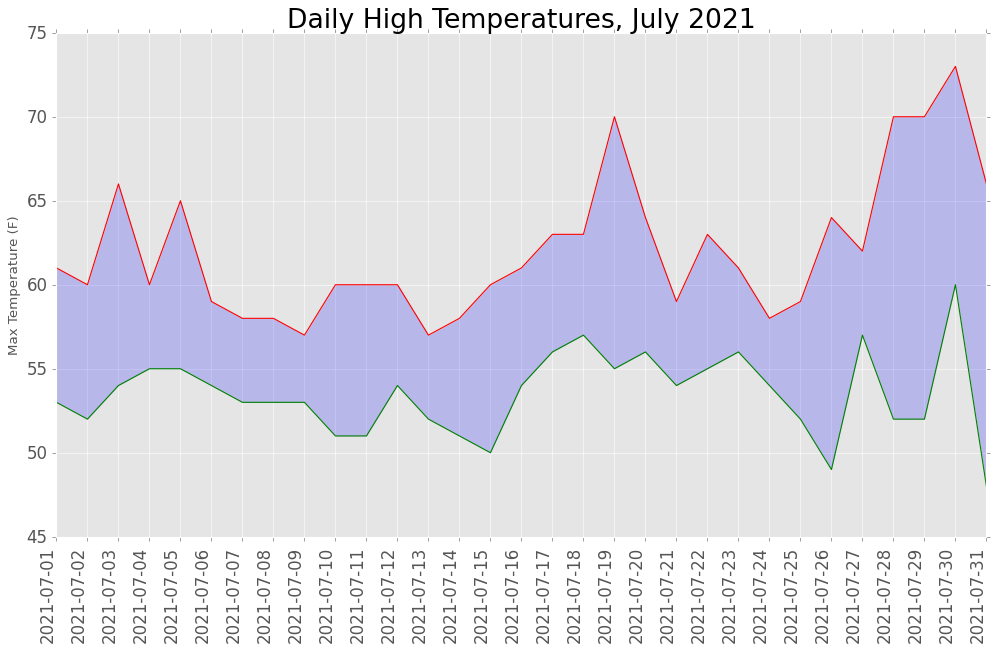

In [10]:
# Plot the line of temperature data
plt.style.use('ggplot')
fig, axs = plt.subplots(figsize=[15,9])
axs.plot(data['DATE'], data['TMAX'], color='red')
axs.plot(data['DATE'], data['TMIN'], color='green')

axs.set_title("Daily High Temperatures, July 2021", fontsize=24)
axs.set_ylabel('Max Temperature (F)')
axs.tick_params(labelsize=15)

axs.fill_between(data['DATE'], data['TMAX'], data['TMIN'], facecolor='blue', alpha=0.2)

fig.autofmt_xdate(rotation=90)
plt.show()

In [11]:
# Load json data for earthquake
import json
from pathlib import Path
path = Path(r'C:\Users\asus\Desktop\python_work\pcc_3e-main\chapter_16\mapping_global_datasets\eq_data\eq_data_30_day_m1.geojson')
content = path.read_text(encoding='utf-8')
data = json.loads(content)

df = pd.json_normalize(data['features'])
df.head()

type            id  properties.mag               properties.place  \
0  Feature  ak0224bju1jx            1.60   27 km NNW of Susitna, Alaska   
1  Feature  ak0224bjowco            1.60  63 km SE of Pedro Bay, Alaska   
2  Feature  ak0224bjnd7y            2.20  27 km SSE of Cantwell, Alaska   
3  Feature    us7000gzhx            3.70                south of Alaska   
4  Feature    hv72972837            2.92    49 km SE of Naalehu, Hawaii   

   properties.time  properties.updated properties.tz  \
0    1649051836769       1649052020437          None   
1    1649050396662       1649050785063          None   
2    1649049962786       1649050629179          None   
3    1649049432877       1649051314040          None   
4    1649048457870       1649051014040          None   

                                      properties.url  \
0  https://earthquake.usgs.gov/earthquakes/eventp...   
1  https://earthquake.usgs.gov/earthquakes/eventp...   
2  https://earthquake.usgs.gov/earthquakes/eventp...   
3  https://earthquake.usgs.gov/earthquakes/eventp...   
4  https://earthquake.usgs.gov/earthquakes/eventp...   

                                   properties.detail  properties.felt  ...  \
0  https://earthquake.usgs.gov/earthquakes/feed/v...              NaN  ...   
1  https://earthquake.usgs.gov/earthquakes/feed/v...              NaN  ...   
2  https://earthquake.usgs.gov/earthquakes/feed/v...              NaN  ...   
3  https://earthquake.usgs.gov/earthquakes/feed/v...              NaN  ...   
4  https://earthquake.usgs.gov/earthquakes/feed/v...              NaN  ...   

               properties.types  properties.nst properties.dmin  \
0           ,origin,phase-data,             NaN             NaN   
1           ,origin,phase-data,             NaN             NaN   
2           ,origin,phase-data,             NaN             NaN   
3  ,origin,phase-data,shakemap,             NaN           0.271   
4           ,origin,phase-data,            31.0             NaN   

  properties.rms  properties.gap  properties.magType properties.type  \
0           0.54             NaN                  ml      earthquake   
1           0.16             NaN                  ml      earthquake   
2           0.53             NaN                  ml      earthquake   
3           0.60           194.0                  ml      earthquake   
4           0.17           279.0                  md      earthquake   

                        properties.title geometry.type  \
0   M 1.6 - 27 km NNW of Susitna, Alaska         Point   
1  M 1.6 - 63 km SE of Pedro Bay, Alaska         Point   
2  M 2.2 - 27 km SSE of Cantwell, Alaska         Point   
3                M 3.7 - south of Alaska         Point   
4    M 2.9 - 49 km SE of Naalehu, Hawaii         Point   

                                geometry.coordinates  
0                         [-150.7585, 61.7591, 56.3]  
1                         [-153.4716, 59.3152, 97.9]  
2                         [-148.7531, 63.1633, 52.6]  
3                         [-159.6267, 54.5612, 19.6]  
4  [-155.248336791992, 18.7551670074463, 8.689999...  

[5 rows x 30 columns]

In [12]:
# world map
title = 'Global Earthquakes'
df['lat'] = df['geometry.coordinates'].apply(lambda x: x[0])
df['lon'] = df['geometry.coordinates'].apply(lambda x: x[1])

fig = px.scatter_geo(df, lat='lat', lon='lon', title=title, size='properties.mag', color='properties.mag', projection='natural earth', hover_name='properties.place')
fig.show()

In [13]:
# Working with Github API to get most starred repos 
import requests
url = "https://api.github.com/search/repositories?q=language:python+sort:stars+stars:>10000"
headers = {'Accept': 'applications/vnd.github.v3+json'}
r = requests.get(url, headers=headers)
print(f"Status Code: {r.status_code}")
r_dict = r.json()

print(r_dict.keys())

Status Code: 200
dict_keys(['total_count', 'incomplete_results', 'items'])


In [14]:
# Checking the response
print(f"Total Repos: {r_dict['total_count']}")
print(f"Completed Result: {not r_dict['incomplete_results']}")
print(f"Repos Returned: {len(r_dict['items'])}")

# Check 1st repo
print(f"\n1st Repo keys: {len(r_dict['items'][0])}")
print(f"\n1st Repo keys: {sorted(r_dict['items'][0].keys())}")

Total Repos: 511
Completed Result: True
Repos Returned: 30

1st Repo keys: 80

1st Repo keys: ['allow_forking', 'archive_url', 'archived', 'assignees_url', 'blobs_url', 'branches_url', 'clone_url', 'collaborators_url', 'comments_url', 'commits_url', 'compare_url', 'contents_url', 'contributors_url', 'created_at', 'default_branch', 'deployments_url', 'description', 'disabled', 'downloads_url', 'events_url', 'fork', 'forks', 'forks_count', 'forks_url', 'full_name', 'git_commits_url', 'git_refs_url', 'git_tags_url', 'git_url', 'has_discussions', 'has_downloads', 'has_issues', 'has_pages', 'has_projects', 'has_wiki', 'homepage', 'hooks_url', 'html_url', 'id', 'is_template', 'issue_comment_url', 'issue_events_url', 'issues_url', 'keys_url', 'labels_url', 'language', 'languages_url', 'license', 'merges_url', 'milestones_url', 'mirror_url', 'name', 'node_id', 'notifications_url', 'open_issues', 'open_issues_count', 'owner', 'private', 'pulls_url', 'pushed_at', 'releases_url', 'score', 'size',

In [15]:
# Checking the info about 1st repo
print(f"Name: {r_dict['items'][0]['name']}")
print(f"Created at: {r_dict['items'][0]['created_at']}")
print(f"Updated at: {r_dict['items'][0]['updated_at']}")
print(f"Stars: {r_dict['items'][0]['stargazers_count']}")
print(f"URL: {r_dict['items'][0]['html_url']}")
print(f"Owner login: {r_dict['items'][0]['owner']['login']}")
print(f"Desc: {r_dict['items'][0]['description']}")

Name: public-apis
Created at: 2016-03-20T23:49:42Z
Updated at: 2024-07-11T07:58:50Z
Stars: 301344
URL: https://github.com/public-apis/public-apis
Owner login: public-apis
Desc: A collective list of free APIs


In [16]:
# Selected info about all repos having stars > 10000
for repo in r_dict['items']:
    print(f"\nName: {repo['name']}")
    print(f"Stars: {repo['stargazers_count']}")
    print(f"Repo URL: {repo['html_url']}")
    print(f"Owner login: {repo['owner']['login']}")
    print(f"Desc: {repo['description']}")


Name: public-apis
Stars: 301344
Repo URL: https://github.com/public-apis/public-apis
Owner login: public-apis
Desc: A collective list of free APIs

Name: system-design-primer
Stars: 263833
Repo URL: https://github.com/donnemartin/system-design-primer
Owner login: donnemartin
Desc: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.

Name: awesome-python
Stars: 212192
Repo URL: https://github.com/vinta/awesome-python
Owner login: vinta
Desc: An opinionated list of awesome Python frameworks, libraries, software and resources.

Name: Python
Stars: 182087
Repo URL: https://github.com/TheAlgorithms/Python
Owner login: TheAlgorithms
Desc: All Algorithms implemented in Python

Name: AutoGPT
Stars: 163814
Repo URL: https://github.com/Significant-Gravitas/AutoGPT
Owner login: Significant-Gravitas
Desc: AutoGPT is the vision of accessible AI for everyone, to use and to build on. Our mission is to provide the tools, so that you can focus on w

Name: cpython
Stars: 60953
Repo URL: https://github.com/python/cpython
Owner login: python
Desc: The Python programming language

Name: manim
Stars: 60338
Repo URL: https://github.com/3b1b/manim
Owner login: 3b1b
Desc: Animation engine for explanatory math videos

Name: gpt4free
Stars: 59202
Repo URL: https://github.com/xtekky/gpt4free
Owner login: xtekky
Desc: The official gpt4free repository | various collection of powerful language models

Name: d2l-zh
Stars: 58903
Repo URL: https://github.com/d2l-ai/d2l-zh
Owner login: d2l-ai
Desc: 《动手学深度学习》：面向中文读者、能运行、可讨论。中英文版被70多个国家的500多所大学用于教学。


In [17]:
# Lets visualize the name of repos and their stars
data = pd.json_normalize(r_dict['items'])
data['repo_name'] = data.apply(lambda row: f'<a href="{row["html_url"]}" target="_blank">{row["name"]}</a>', axis=1)
title = 'Most-Starred Python Projects on GitHub'
hover_text = data['owner.login'] + '<br />' + data['description']
fig = px.bar(data, x='repo_name', y='stargazers_count', title=title, hover_name=hover_text)

fig.show()

In [18]:
# The Hacker news API
url = 'https://hacker-news.firebaseio.com/v0/item/31353677.json'
r = requests.get(url)
print(f"Status Code: {r.status_code}")

r_dict = r.json()
r_str = json.dumps(r_dict, indent=4)
r_str

Status Code: 200


'{\n    "by": "sohkamyung",\n    "descendants": 307,\n    "id": 31353677,\n    "kids": [\n        31354987,\n        31354235,\n        31354040,\n        31358602,\n        31354201,\n        31354991,\n        31354315,\n        31353775,\n        31353925,\n        31354169,\n        31354273,\n        31354437,\n        31356902,\n        31358694,\n        31363418,\n        31353862,\n        31357186,\n        31356379,\n        31356826,\n        31355085,\n        31369435,\n        31357936,\n        31354142,\n        31354213,\n        31356311,\n        31357865,\n        31353929,\n        31364954,\n        31354621,\n        31356002,\n        31356407,\n        31355491,\n        31359235,\n        31356053,\n        31354347,\n        31355326,\n        31354703,\n        31353802\n    ],\n    "score": 786,\n    "time": 1652361401,\n    "title": "Astronomers reveal first image of the black hole at the heart of our galaxy",\n    "type": "story",\n    "url": "https://pu

In [19]:
# Print a summary of all the articles on the front page of Hacker News
from operator import itemgetter

url = 'https://hacker-news.firebaseio.com/v0/topstories.json'
r = requests.get(url)
print(f"Status Code: {r.status_code}")
submission_ids = r.json()

submission_dicts = []
for submission_id in submission_ids[:5]:
    url = f'https://hacker-news.firebaseio.com/v0/item/{submission_id}.json'
    res = requests.get(url)
    print(f"id: {submission_id}\tstatus: {res.status_code}")
    res_dict = res.json()
    
    submission_dict = {
        'title': res_dict['title'],
        'disc_link': f"https://news.ycombinator.com/item?id={submission_id}",
        'comments': res_dict['descendants']
    }
    
    submission_dicts.append(submission_dict)
    
submission_dicts = sorted(submission_dicts, key=itemgetter('comments'), reverse=True)

for submission_dict in submission_dicts:
    print(f"\nTitle: {submission_dict['title']}")
    print(f"Discussion_link: {submission_dict['disc_link']}")
    print(f"Comments: {submission_dict['comments']}")

Status Code: 200
id: 40931636	status: 200
id: 40932492	status: 200
id: 40933110	status: 200
id: 40927438	status: 200
id: 40930549	status: 200

Title: Things I learned while writing an x86 emulator (2013)
Discussion_link: https://news.ycombinator.com/item?id=40927438
Comments: 95

Title: Big Ball of Mud (1999)
Discussion_link: https://news.ycombinator.com/item?id=40930549
Comments: 86

Title: Scientists discover a cause of lupus, possible way to reverse it
Discussion_link: https://news.ycombinator.com/item?id=40931636
Comments: 84

Title: Show HN: Dut, a fast Linux disk usage calculator
Discussion_link: https://news.ycombinator.com/item?id=40932492
Comments: 68

Title: Engineering principles for building financial systems
Discussion_link: https://news.ycombinator.com/item?id=40933110
Comments: 13
